In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## №1. Загрузите данные о выживаемости пассажиров Титаника из файла titanic_train.csv.

In [2]:
tb = pd.read_csv('titanic_train.csv')#датафрейм для основных преобразований
tb_train = pd.read_csv('titanic_train.csv')#датафрейм для исследования зависимостей и второстепенных преобразований

## №2. Представьте данные в виде таблицы. Посмотрите на первые 5 строк.

In [3]:
tb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## №3. Избавьтесь от пустых значений, заменив их на медианные  значения (для количественных признаков) и на последнее встречающееся значение в столбце перед пропуском с помощью метода «ffill» в качестве аргумента функции fillna() (для категориальных)

#### Количество пропущенных значений в каждом столбце:

In [4]:
tb.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Замена пустых значений:

In [5]:
for namecol in tb.columns:
    if(tb[namecol].dtype == np.float64 or tb[namecol].dtype == np.int64):
        tb = tb.fillna(value = {namecol: tb[namecol].median()})
tb = tb.fillna(method = 'ffill')
tb = tb.fillna(value = {'Cabin':'C85'}, limit = 1)
tb

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## №4. Постройте график распределения целевой переменной Survived, а также графики влияния признаков на целевую переменную (попарные зависимости, корреляционные матрицы).

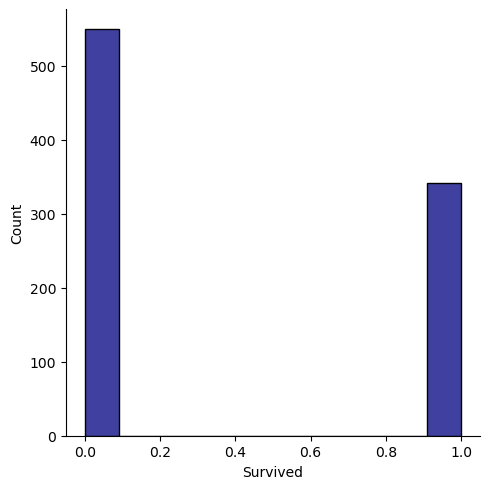

In [6]:
sns.displot(tb.Survived, kde = False, color = "navy")
plt.show()

### График попарных зависимостей

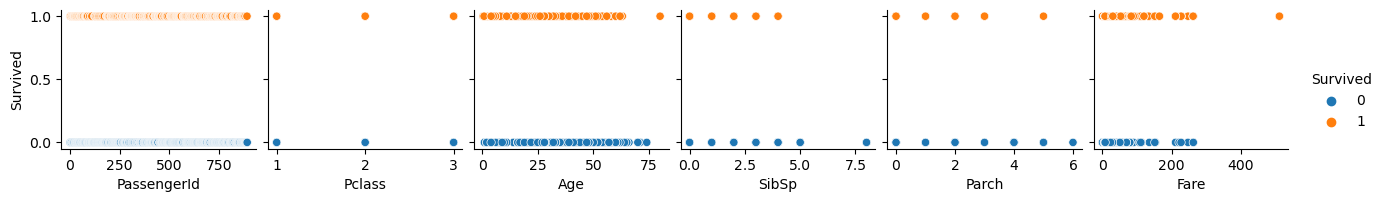

In [7]:
sns.pairplot(tb, y_vars= "Survived", x_vars = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], hue = 'Survived', height = 2.0, aspect = 1.1)
plt.show()

In [8]:
# one_hot_1 = pd.get_dummies(tb['Sex'])
# tb = tb.drop('Sex', axis = 1)
# tb = tb.join(one_hot_1)
# tb.head()
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
tb['Sex']=label.fit_transform(tb['Sex'])
tb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,C123,S


### Корреляционная матрица:

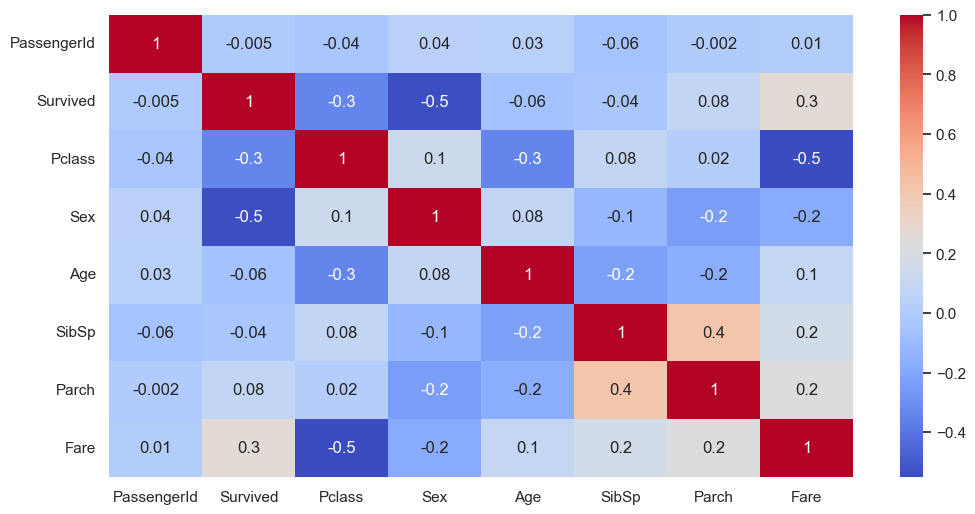

In [9]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(tb.corr(), annot = True, cmap= 'coolwarm', fmt='.1g', cbar_kws = {'orientation': 'vertical'})
plt.show()

## № 5. Произведите отбор признаков. Удалите неинформативные, либо оставьте все. Аргументируйте свой выбор.

#### В первую очередь удалим из датафрейма столбцы: "PassengerId", "Name", "Ticket". Так как эти данные носят чисто справочный характер и никак не помогут нам при обучении модели.

In [10]:
tb = tb.drop(['PassengerId','Name','Ticket'], axis=1)
tb.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,C85,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,C85,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,C123,S


#### Проверим как фактор отсутствия каюты повлиял на выживаемость пассажира:

In [11]:
tb_train['Survived'].groupby(tb_train['Cabin'].isnull()).mean()#проверка взаимосвязи отсутствия каюты пассажиров с их выживаемостью

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

#### Из полученных данных можем наблюдать, что из пассажиров, у которых не было каюты, выжили примерно 30%, в том время как среди тех, у кого каюта была, выжили примерно 67%. Данный признак можно внести в итоговый датафрейм, из которого мы будем формировать обучающую и тестовую выборки, но возможно, что такие результаты напрямую зависят от класса пассажира, чтобы избежать переобучения проверим эту зависимость:

In [12]:
tb_train_1 = tb_train.filter(['Survived', 'Cabin', 'Pclass'], axis = 1)#выделение столбцов индиатора выжившего и каюты в отдельный датафрейм
tb_train_1.head()

,Survived,Cabin,Pclass
0,0,NaN,3
1,1,C85,1
2,1,NaN,3
3,1,C123,1
4,0,NaN,3


In [13]:
tb_train_1['Cabin_indicator'] = np.where(tb_train['Cabin'].isnull(), 0, 1)#Добавим индикатор наличия каюты у пассажира
tb_train_1.head()

,Survived,Cabin,Pclass,Cabin_indicator
0,0,NaN,3,0
1,1,C85,1,1
2,1,NaN,3,0
3,1,C123,1,1
4,0,NaN,3,0


<AxesSubplot:xlabel='Pclass', ylabel='count'>

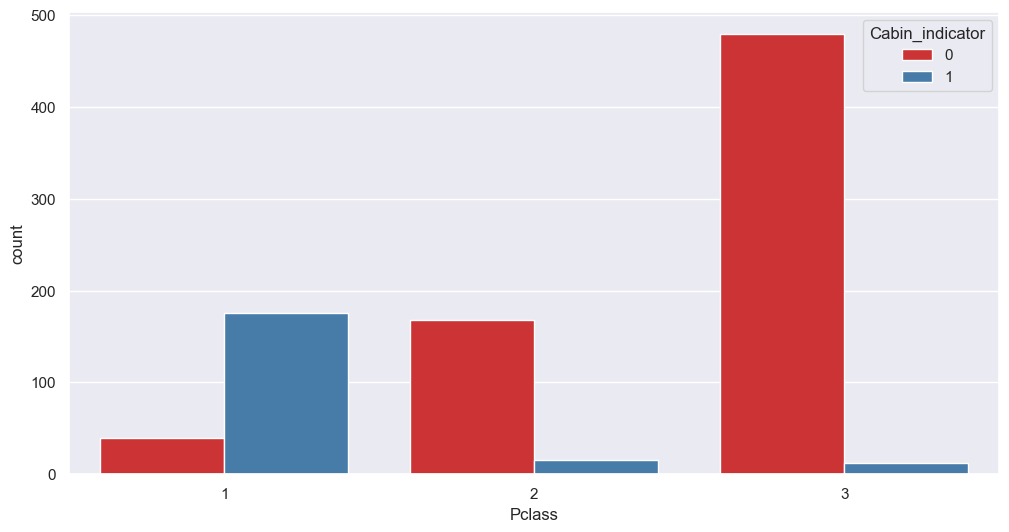

In [14]:
sns.countplot(tb_train_1, x = "Pclass", hue = tb_train_1['Cabin_indicator'], palette = "Set1")#График, отображающий пропуски в значниях каюты в зависимости от класса.

#### На графике видно, что отсутствие записи о каюте прямо зависит от высоты класса пассажира, что может послужить для более точного прогнозирования при обучении модели.

In [15]:
tb['Cabin_indicator'] = np.where(tb_train['Cabin'].isnull(), 0, 1)#Добавим индикатор наличия каюты у пассажира в основной датафрейм
tb = tb.drop(['Cabin'], axis=1)#Удалим записи о номерах кают, так как теперь эти данные не несут нам пользы
tb.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_indicator
0,0,3,1,22.0,1,0,7.2500,S,0
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,0
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,0


#### Проверим выживаемость относительно порта посдаки пассажира:

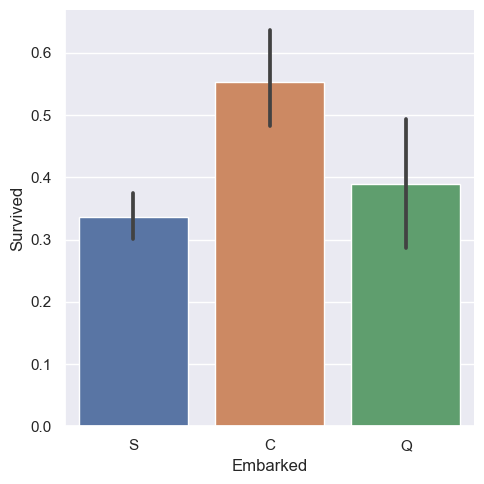

In [16]:
sns.catplot(data = tb_train, x = 'Embarked', y = 'Survived', kind = 'bar')#Распределение выживаемости относительно порта посадки

#### Как можно видеть из графика, наибольший процент выживаемости показали пассажиры, совершившие посадку в порту Шербура. Данный показатель можно отнести к итоговым выборкам, но необходимо проверить, связаны ли эти данные с полом пассажиров, а так же с количеством зашедших в каждом порту:

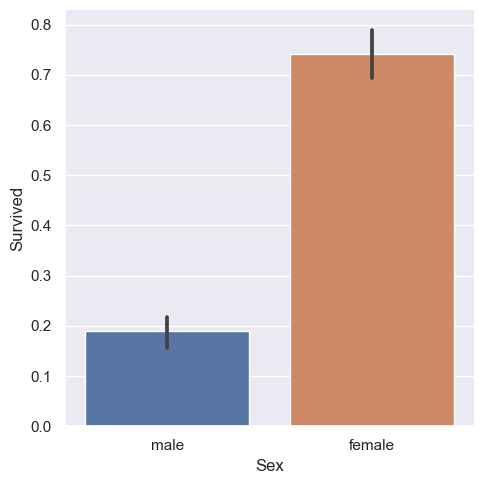

In [17]:
sns.catplot(data = tb_train, x = 'Sex', y = 'Survived', kind = 'bar')#График распределения выживаемости в зависимости от пола пассажира 

#### Из графика можно понять, что среди всех выживших женщины занимают гораздо большую долю чем мужчины

In [18]:
tb_train.pivot_table('Survived', index = 'Sex', columns = 'Embarked', aggfunc = 'count')#Сводная таблица числа пассажиров, зашедших в каждом порту, разделённых по половому признаку

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


#### Из данной таблицы видно, что в порту Шербура количество зашедших женщин и мужчин оказалось примерно одинаковым, в то время как например в Саутгемптоне количество зашедших мужчин гораздо больше чем женщин. Проверим также зависимость класса пассажира от порта посадки:

In [19]:
tb_train.pivot_table('Survived', index = 'Pclass', columns = 'Embarked', aggfunc = 'count')

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


#### Из данной таблицы видим, что пассажиров, зашедших в Шербуре, первого класса больше чем сумма пассажиров второго и третьего класса. Таким образом, видим, что выживаемость пассажиров, зашедших в Шербуре, по сравнению с остальными портами посадки сильно зависит от пола пассажира и количества пассажиров высшего класса, следовательно эти данные в итоговых выборках не принесут нам пользы.

In [20]:
tb = tb.drop(['Embarked'], axis = 1)#Удалим записи о портах посадки.
tb.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_indicator
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


#### Проверим, как на выживаемость повлияло наличие родственников:

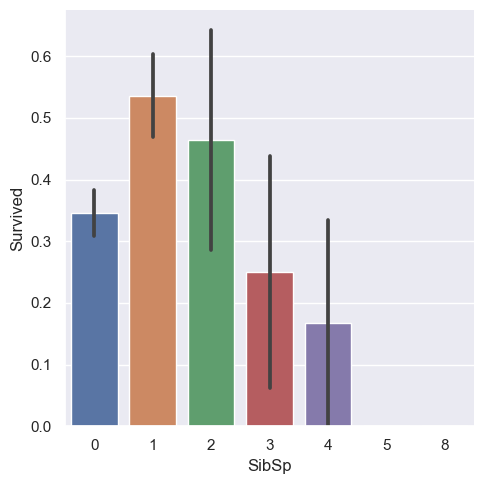

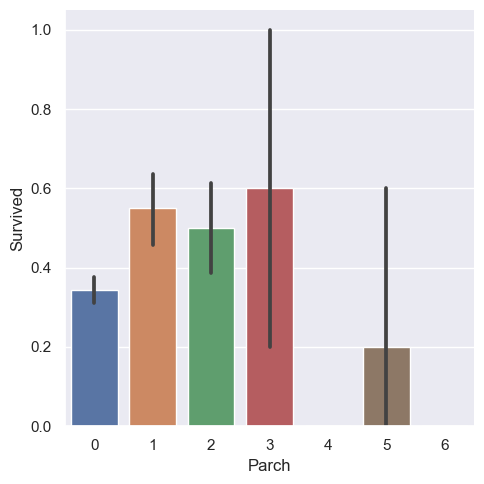

In [21]:
sns.catplot(data = tb_train, x = 'SibSp', y = 'Survived', kind = 'bar')
sns.catplot(data = tb_train, x = 'Parch', y = 'Survived', kind = 'bar')

#### В полученных графиках мы наблюдаем, что прямой зависимости между наличием родственников и выживаемостью нет прямой зависимости,возможно это связано с тем фактором, что большое количество погибших, не имели родственников, это например молодые мужчины, среди которых доля выживших крайне мала:

In [22]:
tb_train.pivot_table('Survived', index = 'Sex', columns = 'SibSp', aggfunc = 'count')#Сводная таблица числа братьев, сестер, сводных братьев, сводных сестер, супругов у пассажиров, разделённых по половому признаку

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,174,106,13,11,6,1,3
male,434,103,15,5,12,4,4


In [23]:
tb_train.pivot_table('Survived', index = 'Sex', columns = 'Parch', aggfunc = 'count')#Сводная таблица числа количество родителей, детей (в том числе приемных) на борту титаника, разделённых по половому признаку

Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,194.0,60.0,49.0,4.0,2.0,4.0,1.0
male,484.0,58.0,31.0,1.0,2.0,1.0,NaN


In [24]:
tb = tb.drop(['SibSp', 'Parch'], axis=1)#Удалим записи о родственниках, так как теперь они не имеют для нас ценности.
tb.head()

,Survived,Pclass,Sex,Age,Fare,Cabin_indicator
0,0,3,1,22.0,7.2500,0
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0


#### Исследуем зависимость возраста пассажиров от их выживаемости:

In [25]:
tb['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Разделим данные о возрасте всех пассажиров по квартилям:

,Survived,interval_age,Pclass,Sex,Age,Fare,Cabin_indicator
0,0,0-22,3,1,22.0,7.2500,0
1,1,35-...,1,0,38.0,71.2833,1
2,1,22-28,3,0,26.0,7.9250,0
3,1,28-35,1,0,35.0,53.1000,1
4,0,28-35,3,1,35.0,8.0500,0


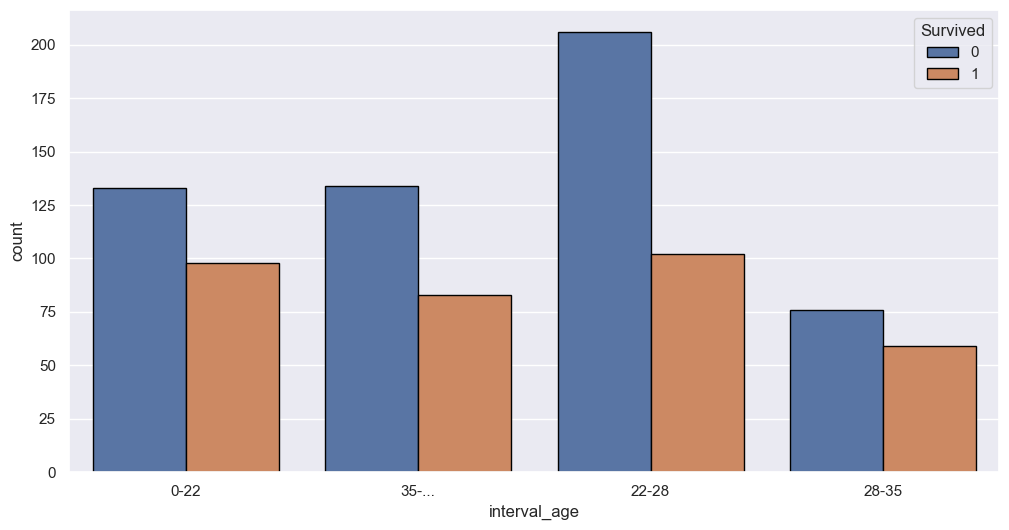

In [26]:
tb.insert(1, "interval_age", 0)
tb["interval_age"] = np.where((tb.Age <= 22), "0-22", tb.interval_age)
tb["interval_age"] = np.where(((tb.Age <= 28) & (tb.Age > 22)), "22-28", tb.interval_age)
tb["interval_age"] = np.where(((tb.Age <= 35) & (tb.Age > 28)), "28-35", tb.interval_age)
tb["interval_age"] = np.where((tb.Age > 35), "35-...", tb.interval_age)

sns.countplot(x = tb["interval_age"], hue = tb["Survived"], edgecolor='black')
tb.head()

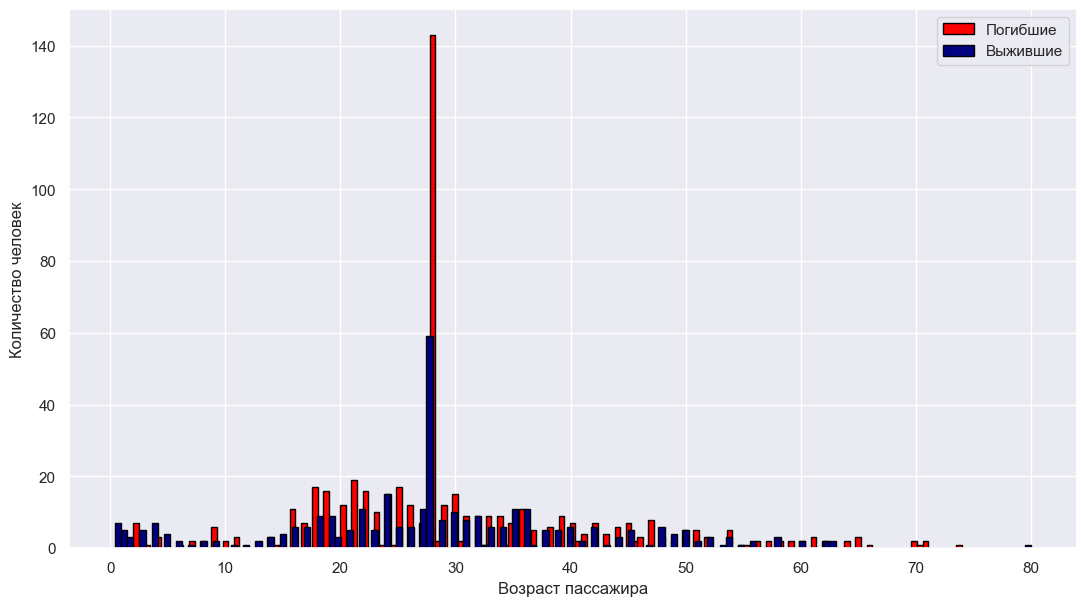

In [27]:
tb[(tb["Survived"] == 0)]["Age"].hist(bins = 150, figsize=(13,7), color = 'red', edgecolor='black',  label = 'Погибшие')
tb[(tb["Survived"] == 1)]["Age"].hist(bins = 150, figsize=(13,7), color = 'navy', edgecolor='black', label = 'Выжившие')
plt.xlabel('Возраст пассажира')
plt.ylabel('Количество человек')
plt.legend()

In [28]:
tb['Survived'].groupby(tb['interval_age']).mean()#Доля выживших в каждом межквартильном интревале

interval_age
0-22      0.424242
22-28     0.331169
28-35     0.437037
35-...    0.382488
Name: Survived, dtype: float64

#### Из полученных данных, а так же из корреляционной матрицы можно сделать вывод, что сильной зависимости между выживаемостью и возрастом пассажиров нет.

In [29]:
tb = tb.drop(['Age', 'interval_age'], axis=1)#Удалим записи о возрасте.
tb.head()

,Survived,Pclass,Sex,Fare,Cabin_indicator
0,0,3,1,7.2500,0
1,1,1,0,71.2833,1
2,1,3,0,7.9250,0
3,1,1,0,53.1000,1
4,0,3,1,8.0500,0


## №6. Закодируйте данные (столбцы object) с помощью выбранного вами метода (словарь, кодировщик LabelEncoder(), One-Hot-Encoding)

In [30]:
print(tb.dtypes)

Survived             int64
Pclass               int64
Sex                  int32
Fare               float64
Cabin_indicator      int32
dtype: object


#### Данных типа object в обработанном датафрейме нет

## №7. Разбейте данные на обучающую и проверочную выборки. Объясните почему вы пользуетесь выбранным методом и в какой пропорции вы выполняете разбиение данных.

#### Масштабируем данные:

In [31]:
from sklearn.preprocessing import StandardScaler # загружаем класс для маштабирования
scal = StandardScaler()
tb_n = tb.drop("Survived", axis = 1)
names = tb_n.columns
tb_scal = scal.fit_transform(tb.drop("Survived", axis = 1))
tb_scal_w = pd.DataFrame(tb_scal, columns = names)
tb_scal_w

,Pclass,Sex,Fare,Cabin_indicator
0,0.827377,0.737695,-0.502445,-0.544925
1,-1.566107,-1.355574,0.786845,1.835115
2,0.827377,-1.355574,-0.488854,-0.544925
3,-1.566107,-1.355574,0.420730,1.835115
4,0.827377,0.737695,-0.486337,-0.544925
...,...,...,...,...
886,-0.369365,0.737695,-0.386671,-0.544925
887,-1.566107,-1.355574,-0.044381,1.835115
888,0.827377,-1.355574,-0.176263,-0.544925
889,-1.566107,0.737695,-0.044381,1.835115


In [32]:
x = tb_scal_w.copy()#копируем наш датафрейм в переменную х
y = tb['Survived']#создаем y - целевую переменную
from sklearn.model_selection import train_test_split #подгружаем функцию, которая разбивает данные случ. образом
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)#разбиение данных на обучающую и тестовую выборки

## №8. Обучите минимум 4 модели классификаторов из разных групп алгоритмов. Подберите метрики для оценки точности, аргументируйте свой выбор и проверьте качество работы каждой модели.
### Для удобства и большей информативности, результаты 8 и 9 пунктов совмещены
## №9. Выполните оценку точности и качества работы модели на обучающей и тестовой выборках с помощью выбранных(ой) метрик(и)

In [33]:
from sklearn.metrics import classification_report # загружаем метрику отчет о классификации
from sklearn.model_selection import GridSearchCV

### (8/9).1. DecisionTreeClassifier (Дерево классификации)
#### (8/9).1.1. Загрузка модели

In [34]:
from sklearn.tree import DecisionTreeClassifier # загрузка из sklearn класса дерева классификаций
clf = DecisionTreeClassifier() # создаем объект класса дерева классификаций

#### (8/9).1.2. Обучение модели

In [35]:
clf.fit(x_train, y_train) # обучение модели на обучающей выборке
#pd.DataFrame(clf.feature_importances_, x_train.columns, columns=["coef_rf"]).sort_values(by = "coef_rf", ascending = False)

DecisionTreeClassifier()

#### (8/9).1.3. Оценка точности работы модели

In [36]:
clf.score(x_train, y_train) # проверяем точность на обучающей выборке

0.9181380417335474

In [37]:
clf.score(x_test, y_test) # проверяем точность на тестовой выборке

0.7947761194029851

In [38]:
y_pred = clf.predict(x_test) # предсазываем y на тестовой выборке
print(classification_report(y_test, y_pred)) # проверяем точность с помощью classification report

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       157
           1       0.82      0.65      0.72       111

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test) # проверяем долю правильных ответов (точность)

0.7947761194029851

In [40]:
confusion_matrix(y_pred, y_test) # строим матрицу ошибок

array([[141,  39],
       [ 16,  72]], dtype=int64)

<AxesSubplot:>

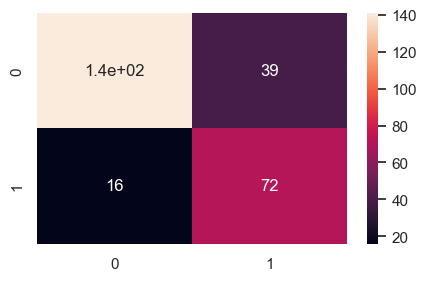

In [41]:
sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True) # строим графически матрицу ошибок

### (8/9).2. k-nearest neighbors (KNN) algorithm (алгоритм k-ближайших соседей)
#### (8/9).2.1. Загрузка модели

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier() # создаем объект класса KNeighborsClassifier

#### (8/9).2.2. Обучение модели

In [43]:
knn_clf.fit(x_train, y_train) # обучаем на обучающей выборке

KNeighborsClassifier()

#### (8/9).2.3. Оценка точности работы модели

In [44]:
knn_clf.score(x_train, y_train) # проверяем точность на обучающей выборке

0.8443017656500803

In [45]:
knn_clf.score(x_test, y_test) # проверяем точность на тестовой выборке

0.8022388059701493

In [46]:
y_pred = knn_clf.predict(x_test) # предсказываем y на тестовой выборке
print(classification_report(y_test, y_pred)) # проверяем точность с помощью classification report

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.83      0.66      0.73       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test) # проверяем долю правильных ответов (точность)

0.8022388059701493

In [48]:
confusion_matrix(y_pred, y_test) # строим матрицу ошибок

array([[142,  38],
       [ 15,  73]], dtype=int64)

<AxesSubplot:>

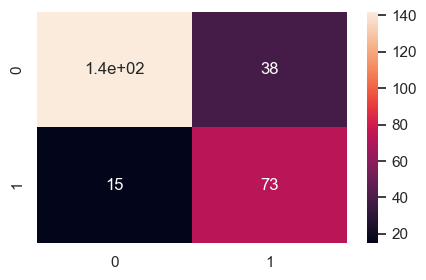

In [49]:
sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True) # строим графически матрицу ошибок

## (8/9).3. RandomForestClassifier (алгоритм случайного леса)

#### (8/9).3.1. Загрузка модели

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()# создаем объект класса RandomForestClassifier

#### (8/9).3.2. Обучение модели

In [51]:
rf_clf.fit(x_train, y_train) # обучаем на обучающей выборке
#pd.DataFrame(rf_clf.feature_importances_, x_train.columns, columns=["coef_rf"]).sort_values(by = "coef_rf", ascending = False)

RandomForestClassifier()

#### (8/9).3.3. Оценка точности работы модели

In [52]:
rf_clf.score(x_train, y_train) # проверяем точность на обучающей выборке

0.9181380417335474

In [53]:
rf_clf.score(x_test, y_test) # проверяем точность на тестовой выборке

0.8134328358208955

In [54]:
y_pred = rf_clf.predict(x_test) # предсказываем y на тестовой выборке
print(classification_report(y_test, y_pred)) # проверяем точность с помощью classification report

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test) # проверяем долю правильных ответов (точность)

0.8134328358208955

In [56]:
confusion_matrix(y_pred, y_test) # строим матрицу ошибок

array([[137,  30],
       [ 20,  81]], dtype=int64)

<AxesSubplot:>

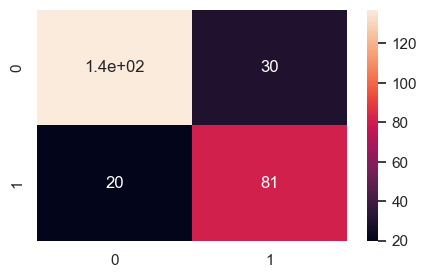

In [57]:
sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True) # строим графически матрицу ошибок

## (8/9).4. SVM (Support vector machine)

#### (8/9).4.1. Загрузка модели

In [58]:
from sklearn.svm import SVC
svc = SVC()# создаем объект класса SVC

#### (8/9).4.2. Обучение модели

In [59]:
svc.fit(x_train, y_train) # обучаем на обучающей выборке

SVC()

#### (8/9).4.3. Оценка точности работы модели

In [60]:
svc.score(x_train, y_train) # проверяем точность на обучающей выборке

0.8009630818619583

In [61]:
svc.score(x_test, y_test) # проверяем точность на тестовой выборке

0.7686567164179104

In [62]:
y_pred = svc.predict(x_test) # предсказываем y на тестовой выборке
print(classification_report(y_test, y_pred)) # проверяем точность с помощью classification report

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       157
           1       0.89      0.50      0.64       111

    accuracy                           0.77       268
   macro avg       0.81      0.73      0.74       268
weighted avg       0.80      0.77      0.75       268



In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test) # проверяем долю правильных ответов (точность)

0.7686567164179104

In [64]:
confusion_matrix(y_pred, y_test) # строим матрицу ошибок

array([[150,  55],
       [  7,  56]], dtype=int64)

<AxesSubplot:>

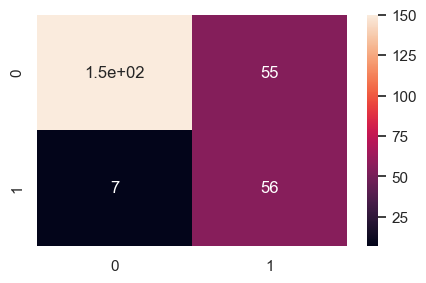

In [65]:
sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True) # строим графически матрицу ошибок

## №10. Выберите лучшую по точности модель для классификации выживаемости пассажиров.

### Лучшие результаты классификации выживаемости пассажиров показала модель:
#### (8/9).3. RandomForestClassifier (алгоритм случайного леса)

## №11. Выполните подбор параметров для данной модели с помощью «поиска по сетке» и кросс-валидации.
### Для удобства и большей информативности, результаты 11 и 12 пунктов совмещены
## №12. Выполните предсказание переменной Survived для тестовой выборки и еще раз оцените точность модели.

In [66]:
from sklearn.model_selection import GridSearchCV# Загружаем модуль для подбора параметров

#### 12.1. Создаем словарь со значениями гиперпараметров для подбора в цикле GridSearchCV

In [67]:
params = {"max_depth": np.arange(1,20,2), "max_features": np.arange(1,20)}

#### 12.2. Создаем объект grid класса GridSearchCV и обучаем на тренировочной выборке

In [68]:
grid = GridSearchCV(RandomForestClassifier(), params, cv = 5, n_jobs = -1) # cv = 5 - кол-во подвыборок для обучения
# n_jobs - кол-во ядер процессора во время обучения

In [69]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

#### 12.3. Смотрим параметры наилучшей модели, созданной в результате обучения

In [70]:
grid.best_estimator_ # параметры лучшей модели

RandomForestClassifier(max_depth=13, max_features=6)

In [71]:
grid.best_score_

0.8219096774193548

In [72]:
rf_clf_par = RandomForestClassifier(max_depth = 13, max_features = 12)
rf_clf_par.fit(x_train, y_train)

RandomForestClassifier(max_depth=13, max_features=12)

In [73]:
rf_clf_par.score(x_train, y_train)

0.9165329052969502

In [74]:
rf_clf_par.score(x_test, y_test)

0.8097014925373134

#### 12.4. Предсказываем и оцениваем точность на тестовой выборке

In [75]:
best_est = grid.best_estimator_ # создаем переменную для лучшей модели
y_pred = best_est.predict(x_test) # предсказываем целевую переменную на тесте
y_pred[:20] # вектор предсказаний

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [76]:
print(classification_report(y_test, y_pred)) # проверяем точность с помощью classification report

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



## №13. Постройте график или таблицу важности признаков.

In [77]:
pd.DataFrame(rf_clf_par.feature_importances_, x_train.columns, columns=["coef_rf"]).sort_values(by = "coef_rf", ascending = False)

,coef_rf
Fare,0.470831
Sex,0.359132
Pclass,0.132516
Cabin_indicator,0.037521


## №14. Сохраните модель в отдельный файл .pkl.

In [78]:
import joblib
joblib.dump(rf_clf_par, "rf_clf_par.pkl") # сохранение модели

['rf_clf_par.pkl']

In [79]:
clf_load = joblib.load("rf_clf_par.pkl") # загрузка модели
clf_load

RandomForestClassifier(max_depth=13, max_features=12)

## №15. Сохраните файл с предсказанием.

In [80]:
type(y_pred)

numpy.ndarray

In [81]:
y_pred_series = pd.Series(y_pred, name="Pred") # создаем объект типа Series для того, чтобы применить метод to_csv (сохранение вектора предсказания в csv)
y_pred_series.to_csv("predict.csv", header=True ) # сохраняем вектор предсказания в csv
pd.read_csv("predict.csv").drop("Unnamed: 0", axis = 1) # читаем файл с предсказанием

,Pred
0,0
1,0
2,0
3,1
4,1
...,...
263,0
264,0
265,1
266,0


In [ ]:
from sklearn.metrics import classification_report #загружаем метрику отчет о классификации
from sklearn.model_selection import GridSearchCV